# Предсказание CTR 2018

Описание файлов

Вам представлены данные поисковых запросов, по которым была показана контекстная реклама одного рекламодателя.

    train.csv - the training set
    test.csv - the test set.

Поля данных

    RowId - идшник для сабмишена
    AveragePosition - средняя позиция объявления на странице выдачи
    CampaignId - рекламная кампания, обычно содежит объявления одной тематики
    AdGroupId  - содержит группу объявлений, которые показываются при совпадении запроса пользователя (Query) с ключевым словом рекламодателя (описывается KeywordId, сами ключевые слова не включены в датасет)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test_upd.csv')

Добавим целевую переменную

In [3]:
train['RPC'] = train['Clicks'] / train['Impressions']

Посмотрим на данные

In [4]:
train.head()

,CampaignId,AdGroupId,KeywordId,Query,QueryMatchTypeWithVariant,Device,Date,AveragePosition,Clicks,Impressions,RPC
0,150950690,7953835370,116881275,may loan,NEAR_EXACT,HIGH_END_MOBILE,2016-08-26,1.0,1,1,1.0
1,150950690,7953835370,116881275,my lloan,NEAR_EXACT,DESKTOP,2016-09-16,1.0,1,1,1.0
2,150950690,7953835370,116881275,my loan,EXACT,DESKTOP,2016-04-05,2.0,1,1,1.0
3,150950690,7953835370,116881275,my loan,EXACT,DESKTOP,2016-04-12,2.0,1,1,1.0
4,150950690,7953835370,116881275,my loan,EXACT,DESKTOP,2016-04-18,1.0,0,1,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56222 entries, 0 to 56221
Data columns (total 11 columns):
CampaignId                   56222 non-null int64
AdGroupId                    56222 non-null int64
KeywordId                    56222 non-null int64
Query                        56222 non-null object
QueryMatchTypeWithVariant    56222 non-null object
Device                       56222 non-null object
Date                         56222 non-null object
AveragePosition              56222 non-null float64
Clicks                       56222 non-null int64
Impressions                  56222 non-null int64
RPC                          56222 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 4.7+ MB


In [6]:
test.head()

,CampaignId,AdGroupId,KeywordId,Query,QueryMatchTypeWithVariant,Device,Date,AveragePosition,Id
0,150950810,24573357890,570188752,wasa kredit,EXACT,HIGH_END_MOBILE,2017-01-13,1.7,0
1,150950810,24573357890,570188752,wasa kredit,EXACT,TABLET,2017-02-09,1.0,1
2,150950810,24573479450,24155728639,marginalen bank,EXACT,DESKTOP,2017-02-07,2.0,2
3,150950810,24573357890,570188752,wasa kredit,EXACT,HIGH_END_MOBILE,2017-01-12,1.9,3
4,150951290,7953845090,29883687951,länsförsäkringar billån,PHRASE,DESKTOP,2017-01-22,1.0,4


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87807 entries, 0 to 87806
Data columns (total 9 columns):
CampaignId                   87807 non-null int64
AdGroupId                    87807 non-null int64
KeywordId                    87807 non-null int64
Query                        87807 non-null object
QueryMatchTypeWithVariant    87807 non-null object
Device                       87807 non-null object
Date                         87807 non-null object
AveragePosition              87807 non-null float64
Id                           87807 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.0+ MB


Взглянем на то, сколько кампаний проводится, каково их количество и как они распределены в обучающей и тестовой выборке

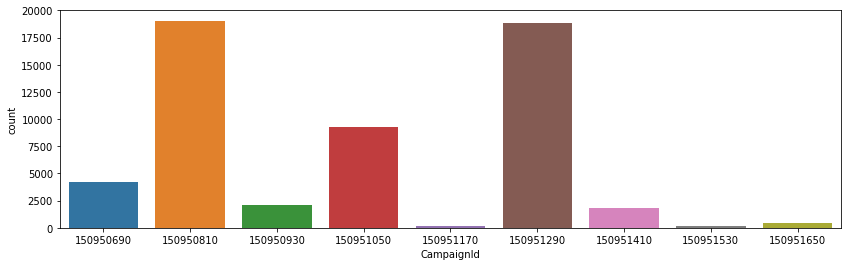

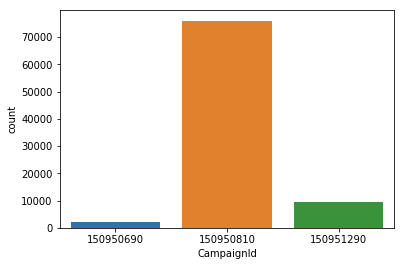

In [8]:
plt.figure(figsize=(14,4))
sns.countplot(x="CampaignId", data=train)
plt.show()
sns.countplot(x="CampaignId", data=test)
plt.show()

Можно заметить, что в трейновой выборке 9 кампаний, в тестовой 3, причем эти три являются подмножеством кампаний из трейновой. Возможно, что оставшиеся 6 кампаний вообще не нужны, в дальнейшем это проверим

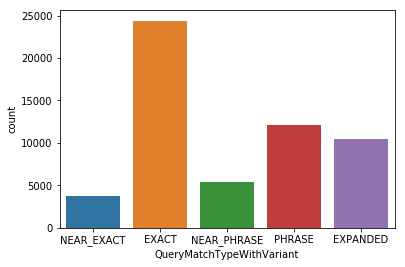

In [9]:
sns.countplot(x="QueryMatchTypeWithVariant", data=train)

Посмотрим, что за Expanded (остальные вроде понятны)

In [13]:
train.loc[train['QueryMatchTypeWithVariant'] == 'EXPANDED']

,CampaignId,AdGroupId,KeywordId,Query,QueryMatchTypeWithVariant,Device,Date,AveragePosition,Clicks,Impressions,RPC
2081,150950690,7953835370,44520786825,how much housing loan i can get for my salary,EXPANDED,DESKTOP,2016-09-05,1.0,1,1,1.00
2086,150950690,7953835370,44520786825,loan money to my paypal account,EXPANDED,DESKTOP,2016-01-19,1.0,1,1,1.00
2087,150950690,7953835370,44520786825,loan money to my paypal account,EXPANDED,DESKTOP,2016-01-29,1.0,1,4,0.25
2095,150950690,7953835370,44520786825,my car loan,EXPANDED,DESKTOP,2016-01-08,1.0,1,1,1.00
2096,150950690,7953835370,44520786825,my car loan,EXPANDED,DESKTOP,2016-02-03,1.0,0,1,0.00
2097,150950690,7953835370,44520786825,my car loan,EXPANDED,DESKTOP,2016-04-21,1.0,1,1,1.00
2098,150950690,7953835370,44520786825,my car loan,EXPANDED,DESKTOP,2016-04-22,1.0,1,1,1.00
2099,150950690,7953835370,44520786825,my car loan,EXPANDED,DESKTOP,2016-07-20,1.0,1,1,1.00
2100,150950690,7953835370,44520786825,my car loan,EXPANDED,DESKTOP,2016-07-26,1.0,1,1,1.00
2101,150950690,7953835370,44520786825,my car loan,EXPANDED,DESKTOP,2016-08-13,1.0,1,1,1.00


In [ ]:
Судя по всему, это запросы, подходящие под тематику рекламы. 